In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'iris-flower:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2275883%2F3820710%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240201%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240201T210024Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74bdebfcc66fc456d2dc979de14ec6812f81da6756760d1f00f92f2e3f9b73afc9a7d4b8417759f760a8ac238c278e38e9a6f59877c68decbbde523c196c07303cb1b5c746e3909f4e698c10a04897011c0cc072e077efe5f995ef07cee6fb55cf71c13bf29cf361d42ff943bdadde584e346e7604e6b429a59434a2d607279269a24fe3cdc1c900b2efca35f34a26070f369346f50ac970326305cde08c5aa446721b9a79db0ca162af6439df93b08e15ef30115d28ece381e19c63e4ed47c0a05f014b4d639506d108bb2c67864318b8b6b6eb4d300fa604bc6dd74b1969275106eaf88bb7d4732b97a34c72e882fbf3b440478429ce76b3408a799360b840'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1017 bytes downloaded
Downloaded and uncompressed: iris-flower
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset_read=pd.read_csv('../input/iris-flower/iris.csv')

In [4]:
dataset_read

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset_read.head(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
dataset_read.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
dataset_read.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset_read.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [9]:
dataset_read.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

In [10]:
dataset_read.nunique

<bound method DataFrame.nunique of      sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal width in cm           class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3       

In [11]:
dataset_updated=dataset_read.rename(columns={'sepal length in cm':'sepal_length','petal length in cm':'petal_length','sepal width in cm':'sepal_width','petal width in cm':'petal_width','class':'species'})

In [12]:
print(dataset_updated)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


<Axes: xlabel='sepal_length', ylabel='petal_length'>

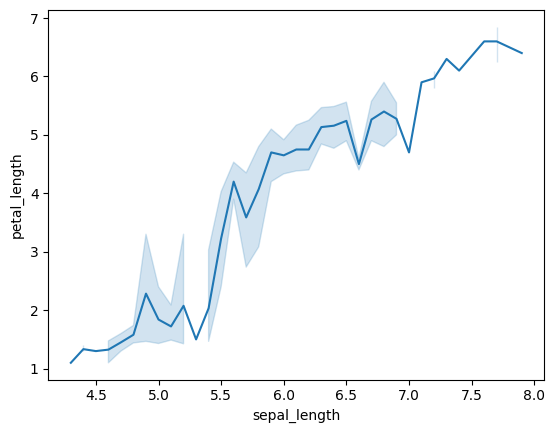

In [13]:
sns.lineplot(x=dataset_updated["sepal_length"],y=dataset_updated["petal_length"])


*Here is the comparision between sepal length and petal length*

Text(0.5, 1.0, 'sepal length vs petal length')

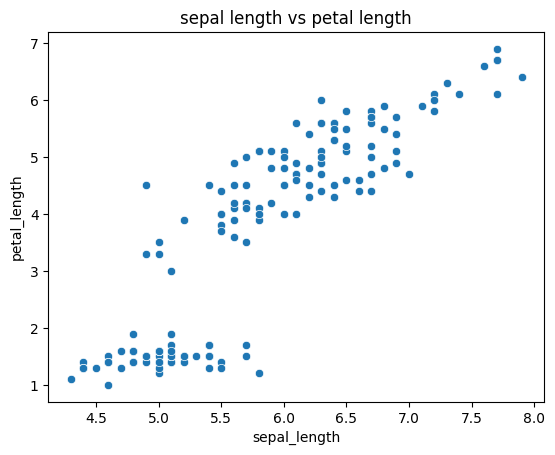

In [14]:
sns.scatterplot(x=dataset_updated["sepal_length"],y=dataset_updated["petal_length"])
plt.title("sepal length vs petal length")



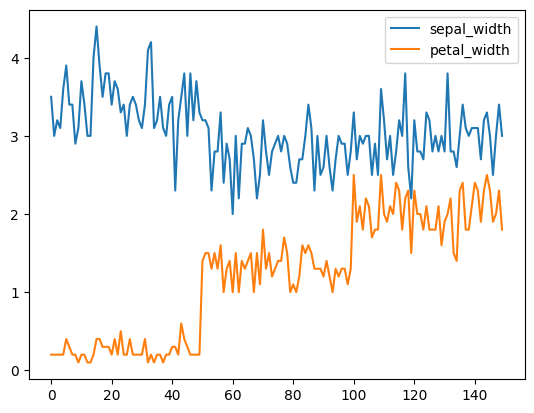

In [15]:
plt.plot(dataset_updated['sepal_width'])
plt.plot(dataset_updated['petal_width'])
plt.legend(["sepal_width", "petal_width"])


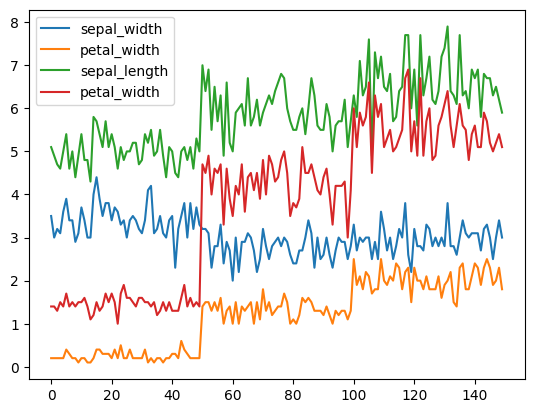

In [16]:
plt.plot(dataset_updated['sepal_width'])
plt.plot(dataset_updated['petal_width'])
plt.plot(dataset_updated['sepal_length'])
plt.plot(dataset_updated['petal_length'])
plt.legend(["sepal_width", "petal_width","sepal_length","petal_width"])
plt.rcParams["figure.figsize"]=(18,5)


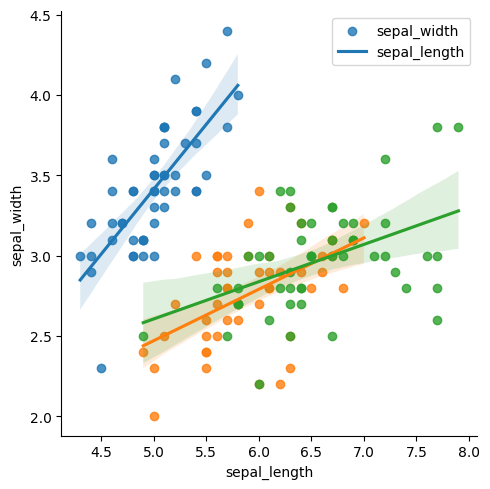

In [17]:
sns.lmplot( x="sepal_length", y="sepal_width", data=dataset_updated, hue='species', legend=False)

plt.legend(["sepal_width","sepal_length"])

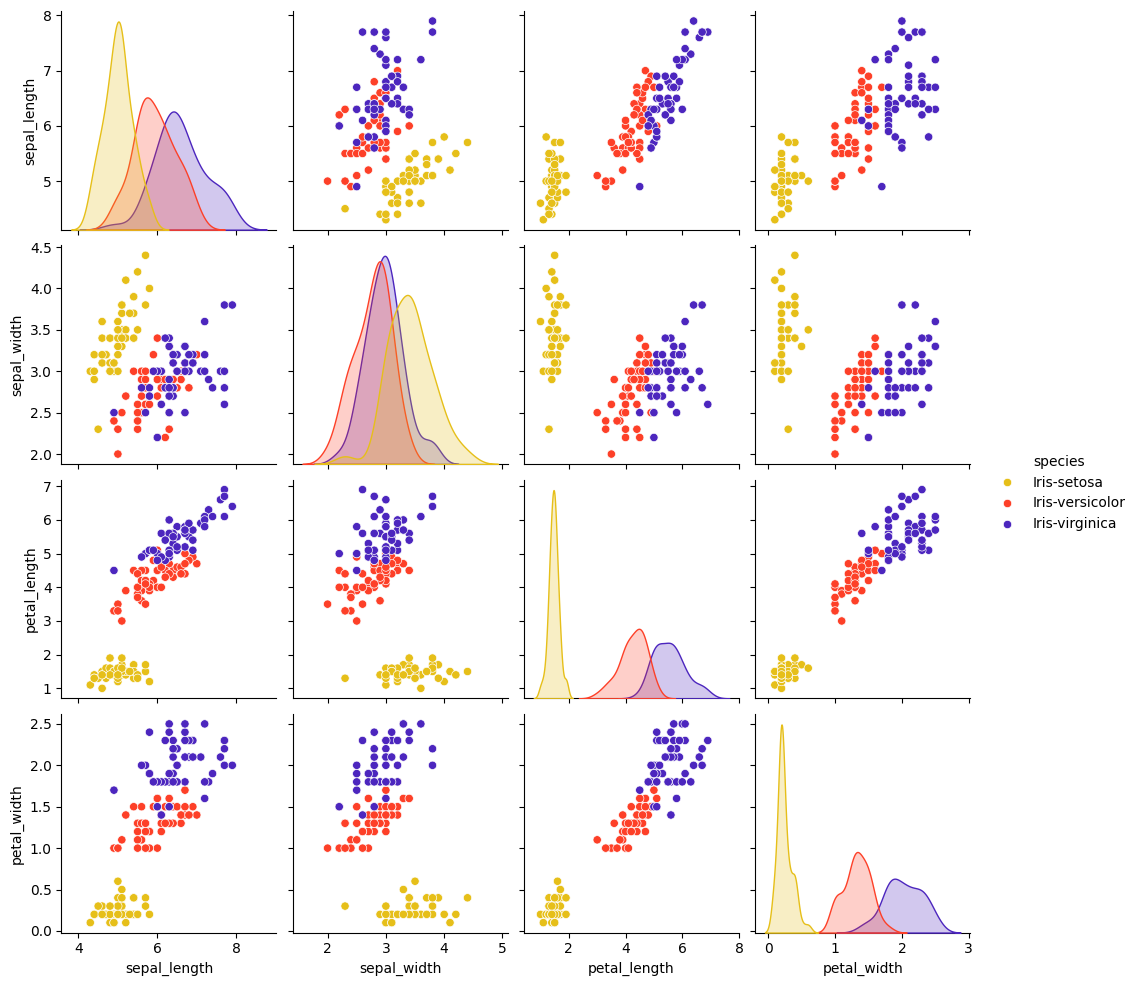

In [18]:
sns.pairplot(dataset_updated, hue = "species",palette='CMRmap_r')


**after graphing the features in a pair plot,** it is clear that the relationship between pairs of features of a **iris-setosa (yellow)** is distinctly different from those of the other two species.

There is some overlapping going  in the pairwise relationships of the other two species,**iris-versicolor (orange)** and **iris-virginica (blue)**.

Text(0.5, 1.0, 'petal_width')

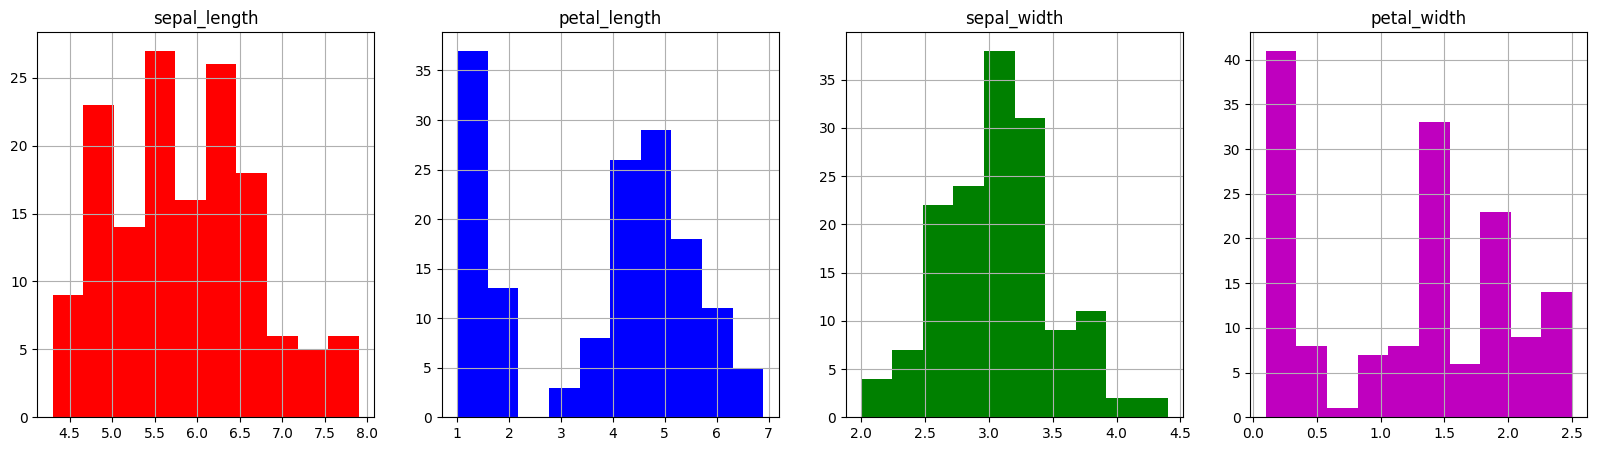

In [19]:
fig,axes=plt.subplots(1,4,figsize=(20,5))

dataset_updated['sepal_length'].hist(ax=axes[0],color="r").set_title("sepal_length")
dataset_updated['petal_length'].hist(ax=axes[1],color="b").set_title("petal_length")
dataset_updated['sepal_width'].hist(ax=axes[2],color="g").set_title("sepal_width")
dataset_updated['petal_width'].hist(ax=axes[3],color="m").set_title("petal_width")



<ipython-input-20-e36a8afe6103>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_updated["species"],y=dataset_updated["sepal_length"],palette='cool',ax=axes[0][0]).set_title('species vs sepal_length')
<ipython-input-20-e36a8afe6103>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_updated["species"],y=dataset_updated["sepal_width"],palette='cool',ax=axes[1][0]).set_title('species vs sepal_width')
<ipython-input-20-e36a8afe6103>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataset_updated["species"],y=dataset_updated

Text(0.5, 1.0, 'species vs petal_width')

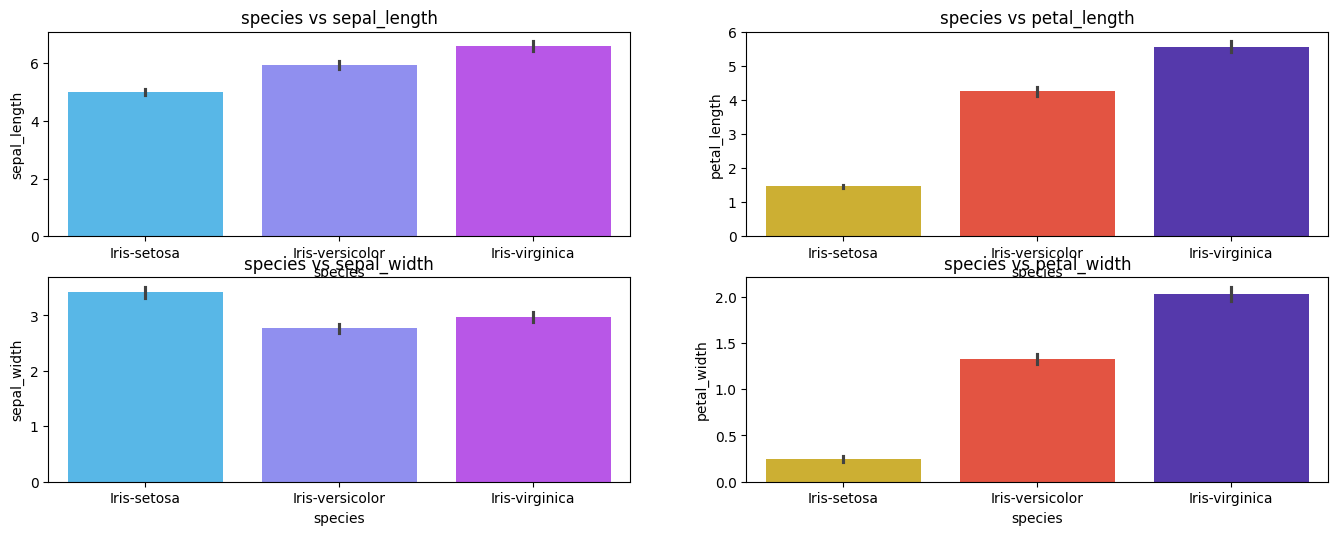

In [20]:
fig,axes=plt.subplots(2,2,figsize=(16,5))
plt.subplots_adjust(left=0.1,
                     bottom=0.1,
                    right=0.9,
                    top=1
                    )
sns.barplot(x=dataset_updated["species"],y=dataset_updated["sepal_length"],palette='cool',ax=axes[0][0]).set_title('species vs sepal_length')
sns.barplot(x=dataset_updated["species"],y=dataset_updated["sepal_width"],palette='cool',ax=axes[1][0]).set_title('species vs sepal_width')
sns.barplot(x=dataset_updated["species"],y=dataset_updated["petal_length"],palette='CMRmap_r',ax=axes[0][1]).set_title('species vs petal_length')
sns.barplot(x=dataset_updated["species"],y=dataset_updated["petal_width"],palette='CMRmap_r',ax=axes[1][1]).set_title('species vs petal_width')




Text(0.5, 1.0, 'iris species classifications')

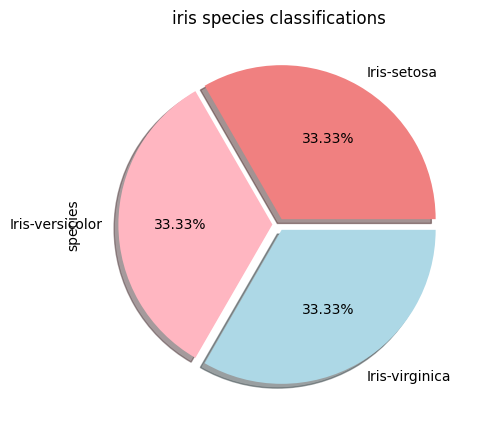

In [21]:
dataset_updated['species'].value_counts().plot.pie(explode=[0.04,0.04,0.04],shadow=True,autopct='%1.2f%%',colors=["lightcoral","lightpink","lightblue"],).set_title("iris species classifications")

In [22]:
correlation=dataset_updated.corr()

<ipython-input-22-cc9ce0a83f4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=dataset_updated.corr()


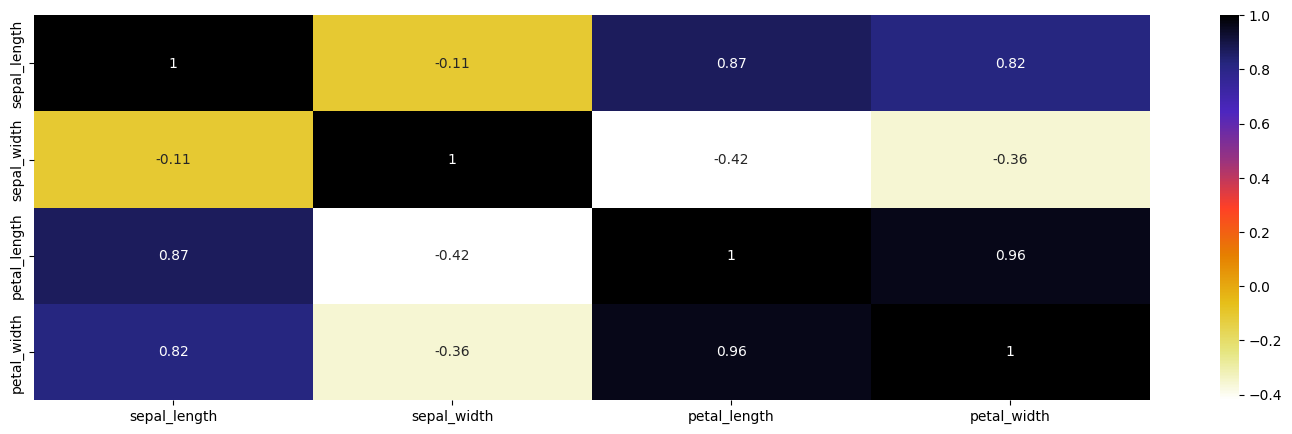

In [23]:

sns.heatmap(correlation,annot=True,cmap='CMRmap_r')
plt.rcParams["figure.figsize"]=(5,5)

In [24]:
 dataset_updated[dataset_updated.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


**GEtting the count of duplicate**

In [25]:
 dataset_updated.duplicated().value_counts()

False    147
True       3
dtype: int64

In [26]:
dataset_updated.drop_duplicates(inplace=True)
dataset_updated.shape

(147, 5)

In [28]:
 dataset_updated.duplicated().any()

False

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.metrics import classification_report

In [29]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()
dataset_updated['species']= label_encoder.fit_transform(dataset_updated['species'])

dataset_updated['species'].unique()

array([0, 1, 2])

In [30]:
dataset_updated["species"].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [31]:
from sklearn.model_selection  import train_test_split

In [32]:
x = dataset_updated.drop(['species'],axis=1)
# independent variable

In [33]:
# independent variable
y = dataset_updated['species']

In [34]:
x_sepal_train,x_sepal_test,y_species_train,y_species_test = train_test_split(x,y,random_state=0,test_size=0.3)

In [35]:
x_sepal_train.shape, x_sepal_test.shape, y_species_train.shape, y_species_test.shape

((102, 4), (45, 4), (102,), (45,))

In [36]:
x_sepal_train

,sepal_length,sepal_width,petal_length,petal_width
140,6.7,3.1,5.6,2.4
116,6.5,3.0,5.5,1.8
99,5.7,2.8,4.1,1.3
96,5.7,2.9,4.2,1.3
62,6.0,2.2,4.0,1.0
...,...,...,...,...
9,4.9,3.1,1.5,0.1
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1
119,6.0,2.2,5.0,1.5


In [37]:
x_sepal_test

,sepal_length,sepal_width,petal_length,petal_width
7,5.0,3.4,1.5,0.2
24,4.8,3.4,1.9,0.2
27,5.2,3.5,1.5,0.2
122,7.7,2.8,6.7,2.0
146,6.3,2.5,5.0,1.9
53,5.5,2.3,4.0,1.3
45,4.8,3.0,1.4,0.3
22,4.6,3.6,1.0,0.2
114,5.8,2.8,5.1,2.4
26,5.0,3.4,1.6,0.4


In [38]:
y_species_train

140    2
116    2
99     1
96     1
62     1
      ..
9      0
105    2
69     1
119    2
49     0
Name: species, Length: 102, dtype: int64

In [39]:
y_species_test

7      0
24     0
27     0
122    2
146    2
53     1
45     0
22     0
114    2
26     0
42     0
80     1
133    2
64     1
73     1
93     1
16     0
56     1
100    2
8      0
91     1
39     0
148    2
86     1
120    2
33     0
147    2
92     1
85     1
107    2
78     1
18     0
47     0
52     1
46     0
2      0
65     1
10     0
134    2
109    2
61     1
112    2
63     1
75     1
125    2
Name: species, dtype: int64

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()

In [42]:
#feed data into model
model.fit(x_sepal_train,y_species_train)
y_species_predicted=model.predict(x_sepal_test)


In [43]:
from sklearn.metrics import accuracy_score

In [ ]:
sc_lr = round(model.score(x_sepal_test, y_species_test) * 100 , 2)

print("Accuracy: ", str(sc_lr) , " %" )

In [45]:
print(model.intercept_)
print(model.coef_)


0.15161053466234198
[-0.10055422 -0.03511623  0.18486627  0.71262547]


In [46]:
 y_pred = model.intercept_  * x_sepal_test+ model.coef_
print(y_pred)

     sepal_length  sepal_width  petal_length  petal_width
7        0.657498     0.480360      0.412282     0.742948
24       0.627176     0.480360      0.472926     0.742948
27       0.687821     0.495521      0.412282     0.742948
122      1.066847     0.389393      1.200657     1.015847
146      0.854592     0.343910      0.942919     1.000685
53       0.733304     0.313588      0.791308     0.909719
45       0.627176     0.419715      0.397121     0.758109
22       0.596854     0.510682      0.336477     0.742948
114      0.778787     0.389393      0.958080     1.076491
26       0.657498     0.480360      0.427443     0.773270
42       0.566532     0.450037      0.381960     0.742948
80       0.733304     0.328749      0.760986     0.879397
133      0.854592     0.389393      0.958080     0.940041
64       0.748465     0.404554      0.730664     0.909719
73       0.824270     0.389393      0.897436     0.894558
93       0.657498     0.313588      0.685181     0.864236
16       0.718

In [48]:
y_pred = model.predict(x_sepal_test)
print(y_pred)

[-0.05073124  0.04332611 -0.0743537   1.94287257  1.70864814  1.1836732
  0.03620202 -0.10996593  2.12318973  0.11028048 -0.02034872  1.00066323
  1.43154971  1.07860153  1.1639264   0.89075628 -0.0029592   1.41130763
  2.2929967   0.00867278  1.28094162 -0.06078666  2.04609564  1.30684664
  2.03819082 -0.14758796  1.77921498  1.07170952  1.40098902  1.76311103
  1.34728458 -0.02692988 -0.02197293  1.32370905 -0.05634653 -0.05051498
  1.18012421 -0.10148779  1.47985439  2.21044966  1.2983685   1.87577114
  1.30293987  1.19369126  1.7071717 ]


In [49]:
dataset_updated = pd.DataFrame({'Actual': y_species_test, 'Predicted': y_pred})
dataset_updated

,Actual,Predicted
7,0,-0.050731
24,0,0.043326
27,0,-0.074354
122,2,1.942873
146,2,1.708648
53,1,1.183673
45,0,0.036202
22,0,-0.109966
114,2,2.123190
26,0,0.110280


In [50]:
from sklearn import linear_model
logistic_model=linear_model.LogisticRegression(max_iter=130)
logistic_model.fit(x_sepal_train,y_species_train)

LogisticRegression(max_iter=130)

In [51]:

y_species_logistic_predicted=logistic_model.predict(x_sepal_test)

#species iris senota

In [52]:
sc_logr = round(logistic_model.score(x_sepal_test, y_species_test) * 100,2)
print("Accuracy: ", str(sc_logr) ,  " %")

Accuracy:  100.0  %


In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_species_test,y_species_test)
cm

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]])

Text(33.22222222222222, 0.5, 'species')

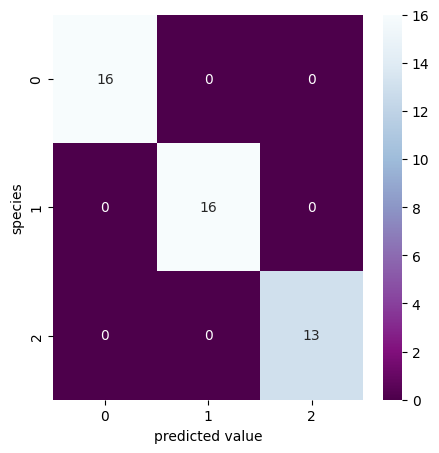

In [54]:
sns.heatmap(cm,annot=True,cmap='BuPu_r')
plt.rcParams["figure.figsize"]=(10,2)
plt.xlabel('predicted value')
plt.ylabel('species')

In [55]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_model.fit(x_sepal_train, y_species_train)

# Predicting the Test set results
y_knn_pred = knn_model.predict(x_sepal_test)

In [56]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_species_test, y_knn_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [57]:
knn_cm=confusion_matrix(y_species_test, y_knn_pred)
knn_cm

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]])

In [58]:
accuracy = accuracy_score(y_species_test, y_knn_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.56 %.


Text(95.72222222222221, 0.5, 'species')

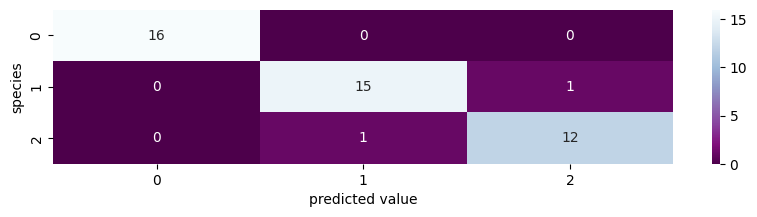

In [59]:
sns.heatmap(knn_cm,annot=True,cmap='BuPu_r')
plt.rcParams["figure.figsize"]=(10,2)
plt.xlabel('predicted value')
plt.ylabel('species')

In [61]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = knn_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [62]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = logistic_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [63]:
X_new = np.array([[4.6,3.4, 1.4,0.3 ]])
#Prediction of the species from the input vector
prediction = logistic_model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
